<a href="https://colab.research.google.com/github/alphaczar/Deep-Learning/blob/master/EmergencyVsNonEmergency_fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')
from fastai.vision import *
from fastai.metrics import error_rate
from fastai.imports import *

In [ ]:
#tfms= get_transforms(do_flip=True,flip_vert=True,max_rotate=50,max_lighting=0.1,max_warp=0 )

In [3]:
path = '/content/drive/My Drive/EmergencyNonEmergency'
data = ImageDataBunch.from_folder(path, train='train_images', test='test_images',seed =1,valid_pct=0.2,bs=64)

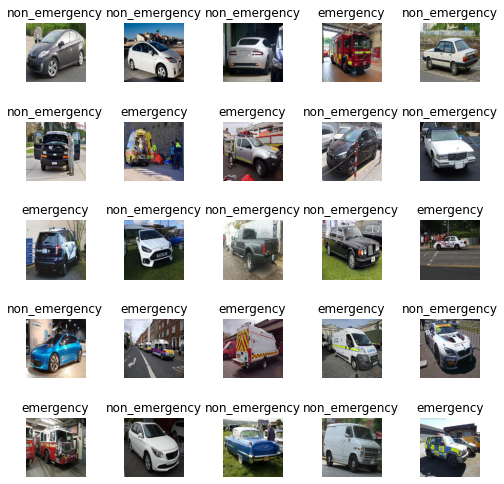

In [4]:
data.show_batch(row=3, figsize=(7, 7))

In [5]:
print(data.classes)
len(data.classes), data.c

['emergency', 'non_emergency']


(2, 2)

In [6]:
learn = cnn_learner(data, models.resnet34, metrics=[error_rate,accuracy])

In [7]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [8]:
learn.summary()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      False     
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     False     
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
___________________________________________________

In [9]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.560674,0.271505,0.082067,0.917933,00:12
1,0.369464,0.273710,0.072948,0.927052,00:10
2,0.255322,0.276701,0.075988,0.924012,00:10
3,0.189564,0.290820,0.079027,0.920973,00:10


In [10]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


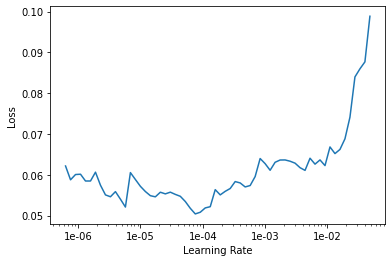

In [12]:
learn.recorder.plot()


In [13]:
learn.unfreeze()

In [14]:
learn.fit_one_cycle(10,max_lr=1e-4)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.107047,0.288356,0.072948,0.927052,00:15
1,0.068732,0.295766,0.069909,0.930091,00:14
2,0.057946,0.275536,0.060790,0.939210,00:14
3,0.051760,0.254981,0.063830,0.936170,00:14
4,0.048868,0.274165,0.069909,0.930091,00:14
5,0.039466,0.313395,0.069909,0.930091,00:14
6,0.033972,0.251233,0.057751,0.942249,00:14
7,0.029152,0.224614,0.051672,0.948328,00:14
8,0.022971,0.227080,0.054711,0.945289,00:14
9,0.017449,0.229908,0.048632,0.951368,00:14


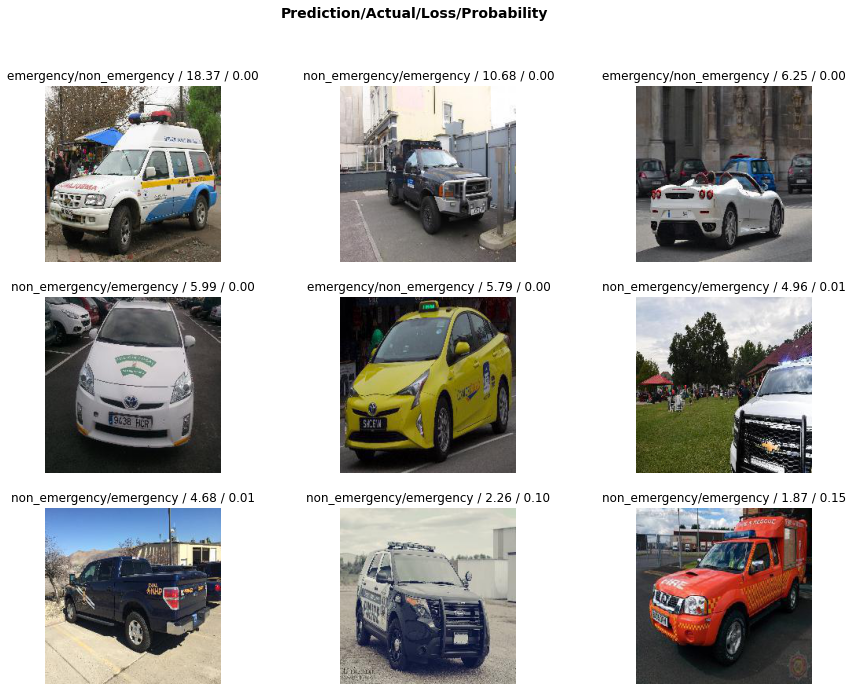

In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9,figsize=(15,11))

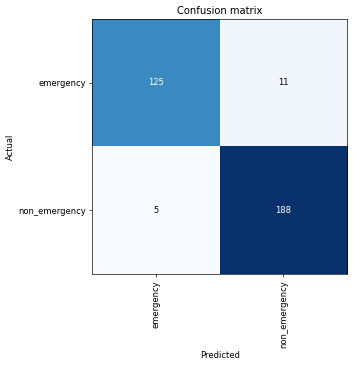

In [16]:
interp.plot_confusion_matrix(figsize =(6,6),dpi=60)

In [17]:
interp.most_confused(min_val=2)

[('emergency', 'non_emergency', 11), ('non_emergency', 'emergency', 5)]

In [18]:
learn.save('res34')

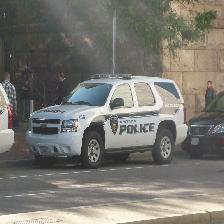

In [45]:
data.test_ds[259][0]

In [47]:
img=data.test_ds[259][0]
p=learn.predict(img)
print(int(p[0]))
print(str(p[0]))

0
emergency


In [51]:
from tqdm import tqdm_notebook
#labs=[]
preds=[]
images=[]
for i in tqdm(range(len(data.test_ds))):
  image=str(data.test_ds.items[i]).split('/')[-1]
  images.append(image)
  p=learn.predict(data.test_ds[i][0])
  #labs.append(int(p[0]))
  preds.append(str(p[0]))



  0%|          | 0/706 [00:00<?, ?it/s]

  1%|          | 5/706 [00:00<00:15, 44.61it/s]

  1%|▏         | 10/706 [00:00<00:15, 44.16it/s]

  2%|▏         | 15/706 [00:00<00:15, 44.78it/s]

  3%|▎         | 20/706 [00:00<00:15, 45.59it/s]

  4%|▎         | 25/706 [00:00<00:14, 46.57it/s]

  4%|▍         | 30/706 [00:00<00:14, 47.47it/s]

  5%|▍         | 35/706 [00:00<00:14, 47.84it/s]

  6%|▌         | 40/706 [00:00<00:13, 48.23it/s]

  6%|▋         | 45/706 [00:00<00:13, 47.28it/s]

  7%|▋         | 51/706 [00:01<00:13, 48.38it/s]

  8%|▊         | 57/706 [00:01<00:13, 49.70it/s]

  9%|▉         | 62/706 [00:01<00:13, 49.43it/s]

 10%|▉         | 68/706 [00:01<00:12, 50.54it/s]

 10%|█         | 74/706 [00:01<00:12, 51.06it/s]

 11%|█▏        | 80/706 [00:01<00:12, 51.17it/s]

 12%|█▏        | 86/706 [00:01<00:11, 51.79it/s]

 13%|█▎        | 92/706 [00:01<00:11, 51.70it/s]

 14%|█▍        | 98/706 [00:01<00:11, 51.62it/s]

 15%|█▍        | 104/706 [00:02<00:11, 51.59it/s]

 16%|█▌

In [ ]:
# predictions, *_ = learn.get_preds(DatasetType.Test)
# labels = np.argmax(predictions, 1)
# labels = labels.numpy()


In [49]:
df=pd.DataFrame(list(zip(images,preds)),columns=['image_name','class'])

In [52]:
df.head()

,image_name,class
0,178.jpg,emergency
1,1817.jpg,non_emergency
2,18.jpg,emergency
3,1780.jpg,non_emergency
4,1827.jpg,non_emergency


In [56]:
path_sub = '/content/drive/My Drive/EmergencyNonEmergency/'

In [57]:
df.to_csv(path_sub + 'sub_file.csv')